# Homework 4
Total number of questions: 3;
Total number of scores: 29 pts + 5 EC

Due date: Dec. 12th, noon (12:00 pm)

## Q1: Eight point algorithm (7 pts)
In this problem, you will estimate the fundamental matrix from a pair of images. You are asked to implement a (simplified) version of the Eight point algorithm, which computes the estimated fundamental matrix from a list of correspondences in the two images. We have provided you with the starter code as well as codes for loading the images, correspondences, and visualizing the epipola lines computed from the estimated fundamental matrix.

Notice that the coordinate system used in epipolar geometry is different from that in NumPy. In specific, the x and y axes are switched (shown below).![alt text](f1.png "Title")
The image pair (and the correspondences) you will be working on for this problem is loaded and illustrated in the next few blocks.

In [4]:
#import sys 
#sys.path.append('/usr/local/lib/python3.9/site-packages')
!pip3 install -U numpy
!pip3 install -U opencv-python

     |████████████████████████████████| 15.3 MB 7.7 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    Uninstalling numpy-1.19.2:
      Successfully uninstalled numpy-1.19.2
     |████████████████████████████████| 52.4 MB 7.5 MB/s eta 0:00:01    |▊                               | 1.2 MB 2.3 MB/s eta 0:00:23


In [5]:
from PIL import Image
import numpy as np
import cv2
from matplotlib import pyplot as plt

def imread(path):
    return np.array(Image.open(path))

In [6]:
# You might need to install the following packages.
# If you are using Google Colab, the following packages are already installed.
# !pip3 install -U numpy
# !pip3 install -U opencv-python

If you use Google Colab, in case you don't know, you can upload files to your google drive, mount the drive and access them just like in a local system. In specific, refer to this official Colab tutorial [link](https://colab.research.google.com/notebooks/io.ipynb#scrollTo=u22w3BFiOveA&line=1&uniqifier=1). Following the step, you can access your `some_file.abc` in your Google Drive by the path `/content/drive/MyDrive/some_file.abc` or something similar. You can use `!ls /content/drive` to examine the specific paths in your Drive. Don't forget to accordingly modify paths to all the provided files.

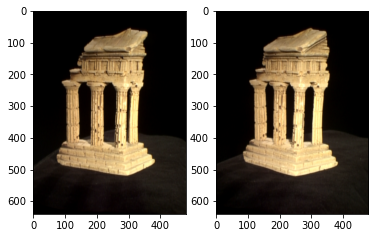

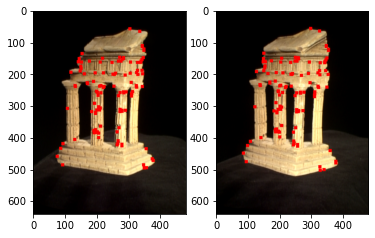

In [7]:
# Read the two images and convert them to double
im1 = imread('./im1.png')
im2 = imread('./im2.png')

# Load the correspondences for the eight point algorithm
pts1 = np.load('./pts1.npy')[:, ::-1]
pts2 = np.load('./pts2.npy')[:, ::-1]

plt.subplot(121)
plt.imshow(im1)
plt.subplot(122)
plt.imshow(im2)
plt.show()

for x, y in pts1:
    im1[y-5:y+5, x-5:x+5] = [255, 0, 0]
plt.subplot(121)
plt.imshow(im1)
for x, y in pts2:
    im2[y-5:y+5, x-5:x+5] = [255, 0, 0]
plt.subplot(122)
plt.imshow(im2)
plt.show()

### Please implement the simplified eight point algorithm below (5 pts)
In this simplified version, you don't need to worry about preprocessing (e.g., normalizing the image coordinates) and postprocessing (forcing the estimated fundamental matrix to be of rank 2). Hint: you can use SVD to find null space of a matrix.

In [8]:
#  Function:    Simplified eightpoint algorithm                                                  
#  Description: Estimate the fundamental matrix F using N given            
#               correspondences (N>=8)                                                                                                         
#               Input:  X and Y - each N x 2 matrices with coordinates     
#                                 that constitute correspondences with     
#                                 the first and second image respectively  
#               Output: F - the 3 x 3 fundamental matrix                   

def eightpoint(X, Y):
    assert X.shape[0] == Y.shape[0], 'X and Y should have same number of rows.'
    assert X.shape[1] == Y.shape[1] == 2
    assert X.shape[0] >= 8, 'At least 8 point pairs are required to compute F.'
    W = []
    
    for i in range(0, 11): 
        
        u = X[i][0]
        v = X[i][1]
        
        
        u_prime = Y[i][0]
        v_prime = Y[i][1]
        
        
        row = []
        row.append(u * u_prime)
        row.append(u * v_prime)
        row.append(u)
        row.append(v * u_prime)
        row.append(v * v_prime)
        row.append(v)
        row.append(u_prime)
        row.append(v_prime)
        row.append(1)
        
        W.append(row)
    W = np.array(W)
        
    U,S,VT = np.linalg.svd(W)
    F_flatten = VT[-1]
    F_prime = F_flatten.reshape(3,3)
    
    F_U, S_U, F_VT = np.linalg.svd(F_prime)
    S_U[2] = 0
    
    F = F_U @ np.diag(S_U) @ F_VT


    return F

In [9]:
# Utility function to draw epipolar lines.
def drawlines(img1, img2, lines, pts1, pts2):
    """ img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines
    """
    r, c, _ = img1.shape
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv2.line(img1, (x0,y0), (x1,y1), color,1)
        img1 = cv2.circle(img1,tuple(pt1),5,color,-1)
        img2 = cv2.circle(img2,tuple(pt2),5,color,-1)
    return img1,img2

### The following block visualizes the epipolar lines computed based on the eight point algorithm you just implemented. Please run it to show your results (2 pts).

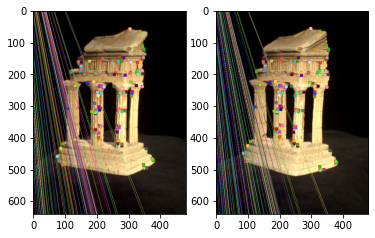

In [10]:
# Compute the fundamental matrix using the eight point algorithm
F = eightpoint(pts1, pts2)

# Visualize the correctness of the estimated F by finding and drawing epilines
lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2, F)
lines1 = lines1.reshape(-1, 3)
im3, _ = drawlines(im1, im2, lines1, pts1, pts2)
lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1,1,2), 2, F)
lines2 = lines2.reshape(-1, 3)
im4, _ = drawlines(im2, im1, lines2, pts2, pts1)

plt.subplot(121)
plt.imshow(im3)
plt.subplot(122)
plt.imshow(im4)
plt.show()

# Q2: Correspondence Estimation (10 pts)
In this problem, you will calculate correspondences using the fundamental matrix estimated from the previous problem. The functions you need to implement is the `compute_correspondence()` and its associated helper functions `get_window()` and `compute_difference()`. `compute_correspondence()` takes in the x and y coordinates of a pixel on `im1` as well as your fundamental matrix F, and returns the coordinates of the pixel on `im2` which correspond to the input point. With the matrix F, instead of searching for our matching point at every possible location in `im2`, we can simply search over the set of pixels that lie along the corresponding epipolar line (recall that the epipolar line passes through a single point in `im2` which corresponds to the point (x1, y1) in `im1`). Slide a window along the epipolar line in `im2`and find the one that matches most closely to the window around the point in `im1`. There are various ways to compute the window similarity, the simplist of which can be the Euclidean distances.

Implementation hints: 
1. You can ignore the windows near the image boundary during searching for simplicity.
2. Try to experiment with different window sizes.
3. Please review to the slides for epipolar geometry.
4. A short [review](http://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/OWENS/LECT11/node12.html) of how to compute epipolar lines.

### Please implement the following functions (8 pts).

In [384]:
from scipy.spatial import distance
# Function:    compute_correspondence                                     
# Description: Slide a window along the epipolar line in im2 and find     
#              the one that matches most closely to the window around     
#              the point in im1                                             
#                                                                        
#              Input:  x1 and y1 - The x and y coordinates of a pixel     
#                                  on im1                                 
#                      im1 and im2 - two images
#                      window_size - size for computing the window similarity
#                      F - The 3*3 fundamental matrix                     
#                                                                    
#              Output: x2 and y2 - The x and y coordinates of the     
#                                  corresponding pixel on im1 

def compute_correspondence(im1, im2, F, x1, y1, window_size):
  
    patch1 = get_window(x1, y1,window_size, im1)
   
    # Compute the epipolar line
    point = np.array([x1, y1, 1])
    F = np.array(F)
    line = np.dot(F, point.T)

    min_distance = 1000000000
    x2 = 0
    y2 = 0
    
    # Use for loop to get the points along the line and find the points that are 
    # closest to the one in image 1
    for t in range(im2.shape[1] - window_size):
        x = line[0]
      
        y = (-t*line[0]-line[2])/line[1]
        
#         if (y > im2.shape[1] or y < 0):
#             continue

        if (t - window_size < 0 or y - window_size < 0 or y + window_size > im2.shape[0]):
            continue
        patch2 = get_window( int(t), int(y), window_size, im2)
        
        d = compute_difference(patch1, patch2, window_size)
     
        if d < min_distance:
            min_distance = d
            x2 = int(t)
            y2 = int(y)
       

    return x2, y2


#  Function:    get_window                                                  
#  Description: Get the intensity values of the window in the given image    
#                                                                         
#               Input:  x and y - The coordinates of the window center     
#                       sizeW - The width of the window                    
#                       image - input image
#                                                                         
#               Output: patch    

def get_window(x, y, sizeW, image):
   
    return image[y-sizeW:y+sizeW, x-sizeW:x+sizeW]


#  Function:    compute_difference                                           
#  Description: compute difference between the two windows                   
#                                                                         
#               Input:  patch1 - patch from image1                         
#                       patch2 - patch from image2                         
#                       sizeW - The width of the window                    
#                                                                         
#               Output: d - distance   


def compute_difference(patch1, patch2, sizeW):
  
    p1 =  np.linalg.norm(patch1.flatten())
    p2 =  np.linalg.norm(patch2.flatten())
    dst = distance.euclidean(p1, p2)
    return dst


### Please show your results using the visualization codes below. Modify the code if necessary. (2 pts)

In [385]:
pts = np.load('./test_pts.npy')[:, ::-1]
np.random.seed(0)
perm = np.random.permutation(len(pts))[:50]
pts = pts[perm]
im1 = imread('./im1.png')
im2 = imread('./im2.png')

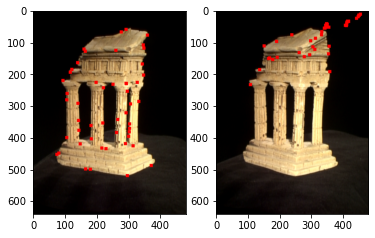

In [386]:
for x, y in pts:
    im1[y-5:y+5, x-5:x+5] = [255, 0, 0]
plt.subplot(121)
plt.imshow(im1)
# Reload the original image1 and 2.
im1 = imread('./im1.png')
im2 = imread('./im2.png')
window_size = 10 # Examine different window_size and choose the one you find the best.
for x, y in pts:
    x, y = compute_correspondence(im1, im2, F, x, y, window_size)
    im2[y-5:y+5, x-5:x+5] = [255, 0, 0]
plt.subplot(122)
plt.imshow(im2)
plt.show()

# Q3: Optical Flow (12 pts)
In this problem, you will implement the Lucas–Kanade method for estimating the optical flow. You can visulize the output by using the provided code. We also have an additional open-ended question for 5 extra points (described at the end). Remark: `scipy.signal.convolve2d()` might be handy.

In [387]:
!pip3 install flow_vis  # Used for visualing optical flow.

### Please implement the following function (10 pts).

In [388]:
# Function:    optical_flow                                     
# Description: use the Lucas–Kanade method to estimate the optical flow
#                                                                        
#              Input:  im1 and im2 - two images    
#                      window_size - size for the window used in LK method
#                                                                    
#              Output: U, V - flow in the x and y directions (each should have shape H x W)
def optical_flow(im1, im2, window_size):
    # referenced: https://experiencor.github.io/optical_flow.html
    Ix = np.zeros(im1.shape)
    Iy = np.zeros(im1.shape)
    It = np.zeros(im1.shape)
    Ix[1:-1, 1:-1] = (im1[1:-1, 2:] - im1[1:-1, :-2]) / 2
    Iy[1:-1, 1:-1] = (im1[2:, 1:-1] - im1[:-2, 1:-1]) / 2
    It[1:-1, 1:-1] = im1[1:-1, 1:-1] - im2[1:-1, 1:-1]
    params = np.zeros(im1.shape + (5,))
    
    params[..., 0] = cv2.GaussianBlur(Ix * Ix, (5, 5), 3)
    params[..., 1] = cv2.GaussianBlur(Iy * Iy, (5, 5), 3)
    params[..., 2] = cv2.GaussianBlur(Ix * Iy, (5, 5), 3)
    params[..., 3] = cv2.GaussianBlur(Ix * It, (5, 5), 3)
    params[..., 4] = cv2.GaussianBlur(Iy * It, (5, 5), 3)
    
    cum_params = np.cumsum(np.cumsum(params, axis=0), axis=1)
    win_params = (cum_params[2 * window_size + 1:, 2 * window_size + 1:] -
                  cum_params[2 * window_size + 1:, :-1 - 2 * window_size] -
                  cum_params[:-1 - 2 * window_size, 2 * window_size + 1:] +
                  cum_params[:-1 - 2 * window_size, :-1 - 2 * window_size])
    
    U = np.zeros(im1.shape)
    V = np.zeros(im1.shape)
    Ixx = win_params[..., 0]
    Iyy = win_params[..., 1]
    Ixy = win_params[..., 2]
    Ixt = -win_params[..., 3]
    Iyt = -win_params[..., 4]
    det = Ixx * Iyy - Ixy ** 2
    temp_u = Iyy * (-Ixt) + (-Ixy) * (-Iyt)
    temp_v = (-Ixy) * (-Ixt) + Ixx * (-Iyt)
    op_flow_x = np.where(det != 0, temp_u / det, 0)
    op_flow_y = np.where(det != 0, temp_v / det, 0)
    
    U[window_size + 1: -1 - window_size, window_size + 1: -1 - window_size] = op_flow_x[:-1, :-1]
    V[window_size + 1: -1 - window_size, window_size + 1: -1 - window_size] = op_flow_y[:-1, :-1]
    return U, V


The next block loads the data, which consists of 101 image sequences constructed from a short video. We ask you to estimate optical flow on the first two images (illustrated below).

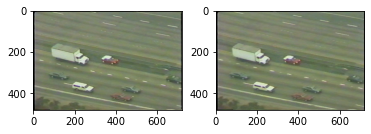

In [389]:
cars = np.load('./cars.npy') # Shape: H x W x 3 x NUM_IMAGES
im1 = cars[..., 0]
im2 = cars[..., 1]
plt.subplot(221)
plt.imshow(im1)
plt.subplot(222)
plt.imshow(im2)
plt.show()

### Please examine the algorithm with different window size, choose the best one you find, and use the following block to visualize your computed optical flow, which converts flow map to a color map (2 pts).

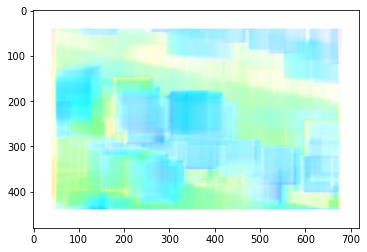

In [390]:
import flow_vis
from skimage import io, color
im1 = color.rgb2gray(im1)
im2 = color.rgb2gray(im2)
U, V = optical_flow(im1, im2, 40)

flow_color = flow_vis.flow_to_color(np.stack([U, V], 2), convert_to_bgr=False)
plt.imshow(flow_color)

## Extra Credits (5 pts)
Although a classical computer vision problem, nowadays, several deep learning approaches have tackled the optical flow estimation problem pretty well (e.g., [FlowNet](https://towardsdatascience.com/a-brief-review-of-flownet-dca6bd574de0), [PWC-Net](https://arxiv.org/abs/1709.02371)), and optical flow has been used in new ways (e.g., [unsupervised object discovery](https://openaccess.thecvf.com/content_CVPR_2019/papers/Xie_Object_Discovery_in_Videos_as_Foreground_Motion_Clustering_CVPR_2019_paper.pdf)). In this open-ended extra credit question, we ask you to identify moving objects from the previously dataset (the image `im1`). In specific, you can use the computed optical flow, together with other machine learning techniques, to group pixels into disjoint areas. You can show the visual result on `im1` as a map that gives each area a different color (e.g., background with negligible optical flow can be black).

Some additional resources that might be helpful:
1. Moving object trajectory clustering [link](https://arxiv.org/abs/1802.06971)
2. Optical flow based moving object detection [link](https://arxiv.org/pdf/1807.04890.pdf)
3. Motion detection by optical flow [link](Tracking Motion without Neural Networks: Optical Flow)